Test per il calcolo della distanza

In [20]:
import cv2

from depthCamera import DepthCamera
from coneDetection import coneIdentification
from colorDetection import colorDetector, DetectorType

video = "video/Video2ProvaSeriaIndoorCurva.bag"

depthCamera = DepthCamera(video, None, True)

depth_frame, color_depth_frame, color_frame, *_ = depthCamera.get_frame()

depth_frame = cv2.resize(depth_frame, (640*2, 640), interpolation = cv2.INTER_AREA)
color_frame = cv2.resize(color_frame, (640*2, 640), interpolation = cv2.INTER_AREA)

cones = coneIdentification(color_frame,'cpu','640x32.pt',True,0.25,0.45,640, True)

# prendo solo un cono
cone = cones[0]

# prendo la bb del cono
x1, y1, x2, y2, _ = cone

color_bb = color_frame[y1:y2, x1:x2]
depth_bb = depth_frame[y1:y2, x1:x2]
depth_color_bb = color_depth_frame[y1:y2, x1:x2]

cone_color = colorDetector(color_frame, None, x1, y1, x2, y2, DetectorType.MASK)
print(cone_color[0])


True
Caricamento registrazione da file...
Using device "cpu"
Fusing layers... 
Image size: 640
Using device "cpu"
Fusing layers... 
Image size: 640

Processing results:
	[220,489] [269,553]	confidence: 94%
	[155,432] [182,471]	confidence: 90%

Processing results:
	[425,442] [450,479]	confidence: 89%
	[290,503] [331,563]	confidence: 87%
	[447,414] [463,442]	confidence: 82%
	[414,405] [425,427]	confidence: 79%
	[377,400] [388,420]	confidence: 75%
	[330,399] [342,413]	confidence: 36%
Inference completed, 8 cone detected in 0.23s
blu


Studiamo solo un cono

In [21]:
# codice di support per visualizzare le immagini
%matplotlib inline
from matplotlib import pyplot as plt

def show_image(image, title="Image", cmap=None):
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=cmap)
	plt.title(title)
	plt.show()

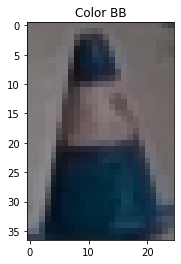

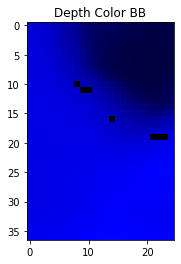

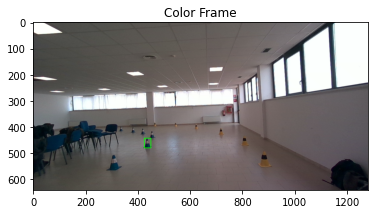

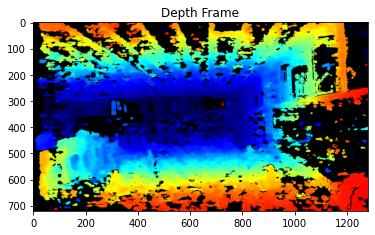

('blu', [59, 44, 2])


In [22]:
show_image(color_bb, "Color BB")
show_image(color_depth_frame[y1:y2, x1:x2], "Depth Color BB")

# creao la bb e mostro tutto il frame
color_frame_cp = color_frame.copy()
cv2.rectangle(color_frame_cp, (x1, y1), (x2, y2), (0, 255, 0), 2)
show_image(color_frame_cp, "Color Frame")

show_image(color_depth_frame, "Depth Frame")

print(cone_color)

Utilizzo della classe depthCone

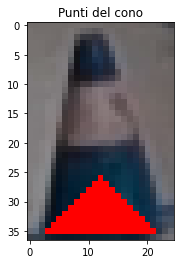

12 26
12 27
13 27
11 27
12 28
13 28
11 28
14 28
10 28
12 29
13 29
11 29
14 29
10 29
15 29
9 29
12 30
13 30
11 30
14 30
10 30
15 30
9 30
16 30
8 30
12 31
13 31
11 31
14 31
10 31
15 31
9 31
16 31
8 31
17 31
7 31
12 32
13 32
11 32
14 32
10 32
15 32
9 32
16 32
8 32
17 32
7 32
18 32
6 32
12 33
13 33
11 33
14 33
10 33
15 33
9 33
16 33
8 33
17 33
7 33
18 33
6 33
19 33
5 33
12 34
13 34
11 34
14 34
10 34
15 34
9 34
16 34
8 34
17 34
7 34
18 34
6 34
19 34
5 34
20 34
4 34
12 35
13 35
11 35
14 35
10 35
15 35
9 35
16 35
8 35
17 35
7 35
18 35
6 35
19 35
5 35
20 35
4 35
21 35
3 35


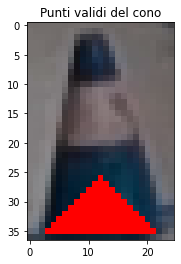

In [23]:
from distance import ConeDepth

cone_depth = ConeDepth(color_bb, depth_bb, x2-x1, y2-y1, cone_color[0])

color_bb_cp1 = color_bb.copy()

for x, y in cone_depth.get_points():
	color_bb_cp1[y, x] = (0, 0, 255)

show_image(color_bb_cp1, "Punti del cono")

cone_depth.reset_iter()

color_bb_cp2 = color_bb.copy()
for x, y in cone_depth.get_valid_points():
	color_bb_cp2[y, x] = (0, 0, 255)
	print(x, y)

show_image(color_bb_cp2, "Punti validi del cono")





Rifacciamo lo stesso procedimento per tutti i coni

blu


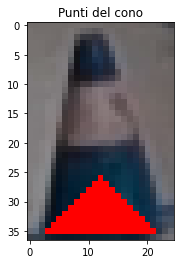

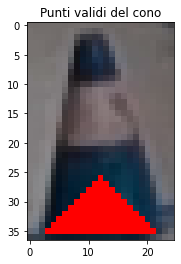

blu


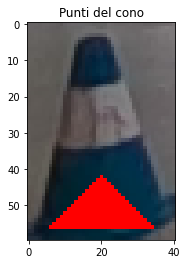

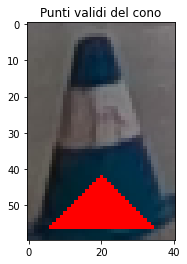

blu


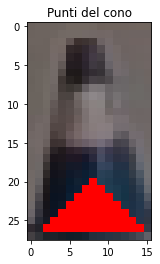

troppo distante
colore sbagliato


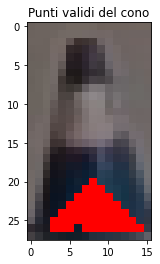

blu


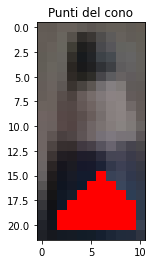

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante


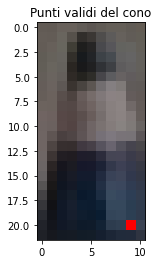

blu


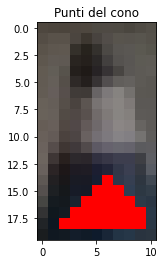

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante


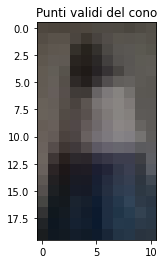

blu


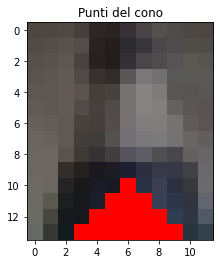

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante


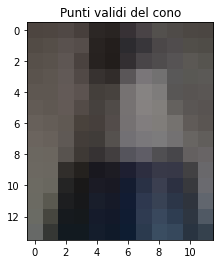

giallo


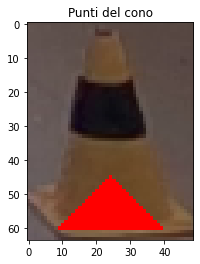

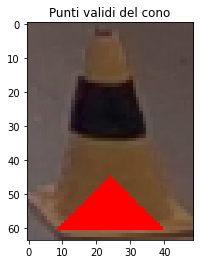

giallo


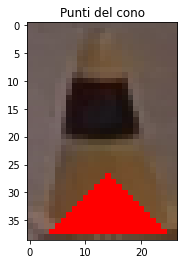

colore sbagliato


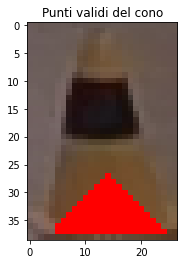

In [29]:

for cone in cones:
	x1, y1, x2, y2, _ = cone

	color_bb = color_frame[y1:y2, x1:x2]
	depth_bb = depth_frame[y1:y2, x1:x2]
	depth_color_bb = color_depth_frame[y1:y2, x1:x2]

	cone_color = colorDetector(color_frame, None, x1, y1, x2, y2, DetectorType.MASK)
	print(cone_color[0])

	cone_depth = ConeDepth(color_bb, depth_bb, x2-x1, y2-y1, cone_color[0])

	color_bb_cp1 = color_bb.copy()

	for x, y in cone_depth.get_points():
		color_bb_cp1[y, x] = (0, 0, 255)

	show_image(color_bb_cp1, "Punti del cono")

	cone_depth.reset_iter()

	color_bb_cp2 = color_bb.copy()
	for x, y in cone_depth.get_valid_points():
		color_bb_cp2[y, x] = (0, 0, 255)

	show_image(color_bb_cp2, "Punti validi del cono")

Aggiungo del rumore al frame di profondità

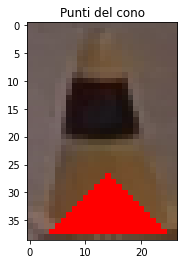

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
colore sbagliato


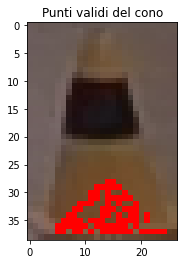

In [30]:
# aggiungo del rumore al depth frame mettendo alcuni punti a 0

import numpy as np

depth_frame_noise_zeros = depth_frame.copy()

for i in range(round(depth_frame.shape[0] * depth_frame.shape[1] * 0.4)):
	x = np.random.randint(0, depth_frame.shape[1])
	y = np.random.randint(0, depth_frame.shape[0])

	depth_frame_noise_zeros[y, x] = 0


# rifaccio il calcolo della profondità

cone_depth = ConeDepth(color_bb, depth_frame_noise_zeros[y1:y2, x1:x2], x2-x1, y2-y1, cone_color[0])

color_bb_cp1 = color_bb.copy()

for x, y in cone_depth.get_points():
	color_bb_cp1[y, x] = (0, 0, 255)

show_image(color_bb_cp1, "Punti del cono")

cone_depth.reset_iter()

color_bb_cp2 = color_bb.copy()

for x, y in cone_depth.get_valid_points():
	color_bb_cp2[y, x] = (0, 0, 255)

show_image(color_bb_cp2, "Punti validi del cono")


Aggiungo del rumore nel frame dell'immagine

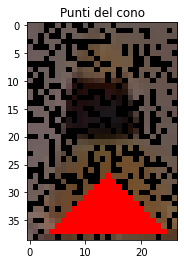

colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato


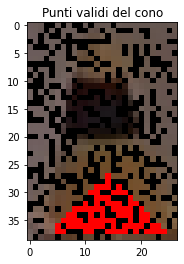

In [31]:
# aggiungo del rumore al color frame

# modifico il color frame modificando il valore bgr di alcuni pixel
color_frame_noise = color_frame.copy()

for i in range(round(color_frame.shape[0] * color_frame.shape[1] * 0.4)):
	x = np.random.randint(0, color_frame.shape[1])
	y = np.random.randint(0, color_frame.shape[0])

	color_frame_noise[y, x] = (0, 0, 0)

# rifaccio il calcolo della profondità

cone_depth = ConeDepth(color_frame_noise[y1:y2, x1:x2], depth_bb, x2-x1, y2-y1, cone_color[0])

color_bb_cp1 = color_frame_noise[y1:y2, x1:x2].copy()

for x, y in cone_depth.get_points():
	color_bb_cp1[y, x] = (0, 0, 255)

show_image(color_bb_cp1, "Punti del cono")

cone_depth.reset_iter()

color_bb_cp2 = color_frame_noise[y1:y2, x1:x2].copy()

for x, y in cone_depth.get_valid_points():
	color_bb_cp2[y, x] = (0, 0, 255)
	
show_image(color_bb_cp2, "Punti validi del cono")


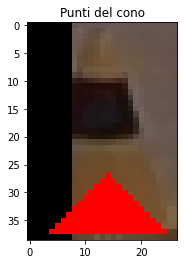

colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato
colore sbagliato


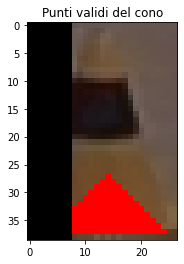

In [32]:
# aggiungo una barra nera al color frame emulando un ostacolo esterno

color_frame_obstacle = color_frame.copy()

bb_color_frame = color_frame_obstacle[y1:y2, x1:x2]

bb_color_frame[:, :round(bb_color_frame.shape[1] * 0.3)] = (0, 0, 0)

# rifaccio il calcolo della profondità

cone_depth = ConeDepth(bb_color_frame, depth_bb, x2-x1, y2-y1, cone_color[0])

color_bb_cp1 = color_frame_obstacle[y1:y2, x1:x2].copy()

for x, y in cone_depth.get_points():
	color_bb_cp1[y, x] = (0, 0, 255)
	
show_image(color_bb_cp1, "Punti del cono")

color_bb_cp2 = color_frame_obstacle[y1:y2, x1:x2].copy()

cone_depth.reset_iter()

for x, y in cone_depth.get_valid_points():
	color_bb_cp2[y, x] = (0, 0, 255)

show_image(color_bb_cp2, "Punti validi del cono")

Esempio di utilizzo della classe depthCone per il calcolo della distanza

colore: blu distanza: 5.84


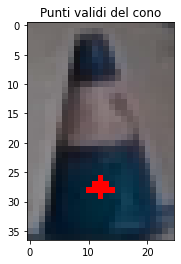

colore: blu distanza: 3.43


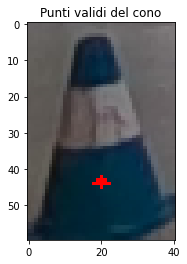

colore: blu distanza: 8.36


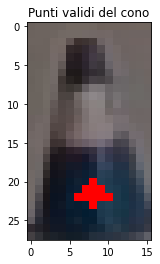

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
colore: blu distanza: 9.97


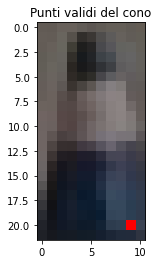

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
colore: blu distanza: None


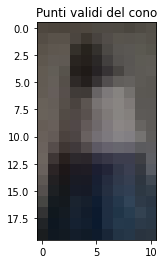

troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
troppo distante
colore: blu distanza: None


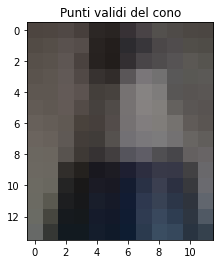

colore: giallo distanza: 3.43


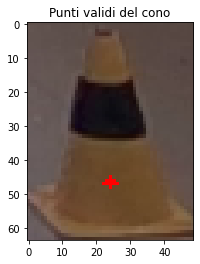

colore: giallo distanza: 5.81


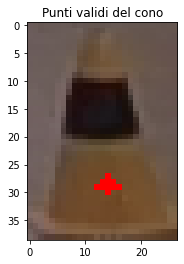

In [28]:
for cone in cones:
	x1, y1, x2, y2, _ = cone

	color_bb = color_frame[y1:y2, x1:x2]
	depth_bb = depth_frame[y1:y2, x1:x2]
	depth_color_bb = color_depth_frame[y1:y2, x1:x2]

	cone_color = colorDetector(color_frame, None, x1, y1, x2, y2, DetectorType.MASK)

	cone_depth = ConeDepth(color_bb, depth_bb, x2-x1, y2-y1, cone_color[0])

	color_bb_cp1 = color_bb.copy()

	color_bb_cp2 = color_bb.copy()

	distance_sum = 0
	i = 0
	for x, y in cone_depth.get_valid_points():
		color_bb_cp2[y, x] = (0, 0, 255)
		distance_sum += cone_depth.get_depth(x, y)
		i += 1

		if i >= 10:
			break
	
	
	distance = round(distance_sum / i, 2) if i > 0 else None

	print("colore:", cone_color[0], "distanza:", distance)

	show_image(color_bb_cp2, "Punti validi del cono")